In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler

In [2]:
data = pd.read_csv("data_cleaned_ml.csv")
data.head(5)

,Unnamed: 0,Unnamed: 0.1,boutique,code_postal,client_anciennete,frequence_visites,captation,causes_achats,produit_prefere,produits_moins_connus,client_internet,volonte_boutique_proche,taille_famille
0,0,0,Saint-Jean-de-Luz,31410,Depuis quelques annees,exceptionelle,bouche_a_oreille,pour me faire plaisir; pour regaler ma famille,Gateau basque,Je ne sais pas,Non,Non,2.0
1,1,1,Saint-Jean-de-Luz,64500,Depuis toujours,exceptionelle,bouche_a_oreille,pour me faire plaisir; pour regaler ma famille...,Autres,Autres,Non,sans_avis,2.0
2,2,2,Saint-Jean-de-Luz,62400,Depuis quelques annees,regulier,boutique,pour me faire plaisir,Autres,Autres,Non,sans_avis,2.0
3,3,3,Saint-Jean-de-Luz,33820,Depuis quelques annees,exceptionelle,boutique,pour me faire plaisir; pour faire un cadeau,Autres,Autres,Non,oui,2.0
4,4,4,Saint-Jean-de-Luz,64210,Depuis quelques annees,exceptionelle,bouche_a_oreille_et_boutique,pour me faire plaisir; pour faire un cadeau,Autres,Gateau basque aux agrumes,Non,sans_avis,2.0


### Choix de la cible et des parametres

In [3]:
y = data['produit_prefere']
X = data['client_anciennete']

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
oh = OneHotEncoder()

In [6]:
X_train_oh = oh.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_oh = oh.transform(np.array(X_test).reshape(-1, 1))

In [7]:
X_2 = data[['client_anciennete','frequence_visites']]

X_2_train,X_2_test, y_2_train, y_2_test = train_test_split(X, y, test_size=0.3)
oh_2 = OneHotEncoder()

X_2_train_oh = oh_2.fit_transform(np.array(X_train).reshape(-1, 1))
X_2_test_oh = oh_2.transform(np.array(X_test).reshape(-1, 1))

### Modele : Foret Aleatoire

In [8]:
rf = RandomForestClassifier()

In [9]:
rf = rf.fit(X_train_oh,y_train)

In [10]:
rf.score(X_test_oh,y_test)

0.48044692737430167

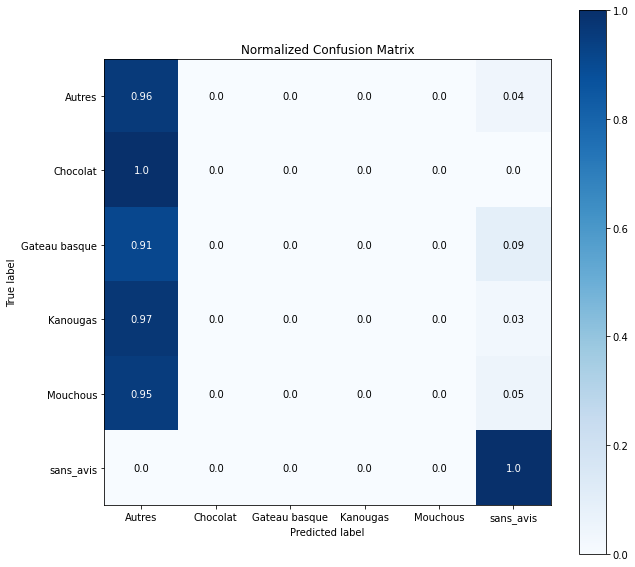

In [11]:
y_pred = rf.predict(X_test_oh)

# matrice de confusion
fig, ax = plt.subplots(figsize=(10, 10))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, ax=ax)
plt.show()

#### Test avec 2 parametres

In [12]:
rf_2 = RandomForestClassifier()

rf_2 = rf_2.fit(X_2_train_oh,y_2_train)

rf_2.score(X_2_test_oh,y_2_test)

0.35195530726256985

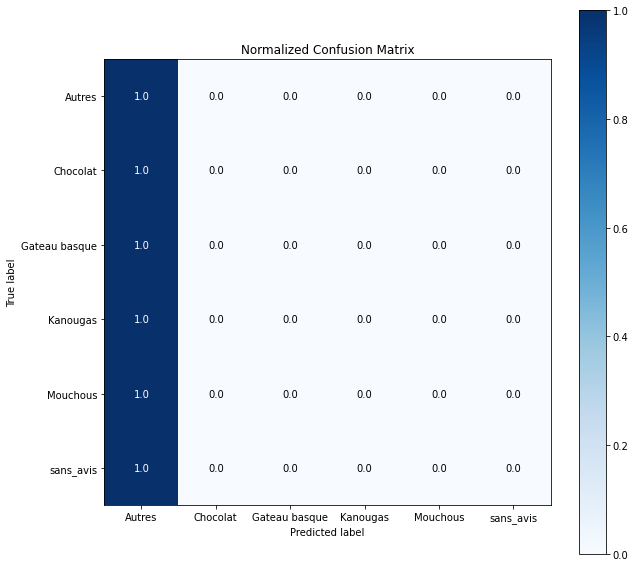

In [13]:
y_2_pred = rf_2.predict(X_2_test_oh)

# matrice de confusion
fig, ax = plt.subplots(figsize=(10, 10))
skplt.metrics.plot_confusion_matrix(y_2_test, y_2_pred, normalize=True, ax=ax)
plt.show()